<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 20px; border-radius: 10px; display:flex; flex-direction: row;"> 
    <img style="width: auto; height: 80px; margin: 0; object-fit: contain;" src="https://www.freepnglogos.com/uploads/google-play-png-logo/google-changes-play-store-png-logo-0.png"/>
    <div style="flex: 1">
        <h1 style="color:white;">Android Play Store Dataset Cleaning</h1>
        <strong><a style="color:white" href="https://www.kaggle.com/lava18/google-play-store-apps">Dataset link</a></strong>
    </div>
</div>

#### Overview and Motivation

This EDA project aims to discover patterns that lead to a successfull application on the Google Play Store. This will be done by analyzing the historical data collected from the Google Play Store as of 03 Feb 2019 according to dataset source. We hypothesize that there are patterns within the data that lead to a successfull app. We are trying find the successfull pattern to develop an app that may be in the high ranks one day, help ad providers know which apps to post their ads on. This will be done by initializing a machine learning model after the data is cleaned, that when givem features about an arbitrary app it gives an estimate rating for that app.

#### Sources we used as aid: 


- How to Calculate Correlation Between Variables in Python: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
- A Beginners Guide to Random Forest Regression: https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb
- seaborn cheat sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

#### Dataset columns description

- **App:** Application name
- **Category:** Category the app belongs to
- **Rating:** Overall user rating of the app (as when scraped)
- **Reviews:** Number of user reviews for the app (as when scraped)
- **Size:** Size of the app (as when scraped)
- **Installs:** Number of user downloads/installs for the app (as when scraped)
- **Type:** Paid or Free
- **Price:** Price of the app (as when scraped)
- **Content:** Rating Age group the app is targeted at - Children / Mature 21+ / Adult
- **Genres:** An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
- **Last Updated:** Date when the app was last updated on Play Store (as when scraped)
- **Current Ver:** Current version of the app available on Play Store (as when scraped)
- **Android Ver:** Min required Android version (as when scraped)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">1. Dataset Reading</h2>
</div>

In [3]:
raw_data = pd.read_csv("data/googleplaystore.csv")
data = raw_data.copy()
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">2. Dataset Discovery</h2>
    <strong style="color:white">dicovering the dataset and get a notion of what the attributes describe.</strong>
</div>

In [4]:
data.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [5]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">3. Dataset Pre-processing</h2>
    <strong style="color:white">Resolving issues that may interfere with the ML model accuracy or the analysis process.</strong>
</div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">3.1 Checking for Missing values</h2>
</div>

In [7]:
data.isnull().sum(0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
data[data["Rating"].isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


In [9]:
data.dropna(axis=0, subset=["Current Ver", "Android Ver", "Type", "Content Rating"], inplace=True)
data = data.copy()

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">There are no missing reviews. However, there're missing rating values. Google play store forces you to rate an app if you're wiritng a review.<strong> Something must have gone wrong during data scraping for the rating values to be missing.</strong> We decided to impute the values using regression.</p>
    </div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">3.2 Checking for duplicate values</h2>
</div>

In [10]:
data.duplicated().value_counts()

False    10346
True       483
dtype: int64

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data["App"].duplicated().value_counts()

False    9648
True      698
Name: App, dtype: int64

In [13]:
duplicated_app = data[data["App"].duplicated()].sort_values("App")

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white"><strong>We found that there're still some duplicate values based on the app name. After further investigation we found that the difference is the number of reviews. So, we dropped the duplicate rows and chose the row with the highest number of reviews to keep.</strong></p>
        <p style="color:white"><strong>We first had to transform Reviews into a numeric column type and fix string values.</strong></p>
    </div>

In [14]:
replacement = dict(M=10**6)
data["Reviews"] = data["Reviews"].replace(replacement, regex=True).astype(int)
data = data.copy()

In [15]:
ordered_slice = data.sort_values(['App', 'Reviews'], ascending=[False, False])
data = ordered_slice.drop_duplicates(["App"])

In [16]:
data["App"].duplicated().value_counts()

False    9648
Name: App, dtype: int64

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">3.3 Data Cleaning</h2>
    <ol style="color: white; font-weight: bold;">
        <li>Change all <em>size</em> values to MB with a numeric type</li>
        <li>Remove all + signs from installs and change the column type into a numeric type</li>
        <li>Remove Dollar values from price column</li>
        <li>Change formatting and type of column date</li>
    </ol>
</div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.3.1 Change all <em>size</em> values to MB with a numeric type</h3>
</div>

In [17]:
data["Size"].str.contains("[Mk+]").value_counts()

True     8421
False    1227
Name: Size, dtype: int64

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">Upon further investigation to row 10472 we found it to have a number of values that don't make sense. <strong>Thus, we decided to drop it.</strong></p>
    </div>

In [18]:
data[data["Size"] == "Varies with device"].shape

(1227, 13)

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">Values of size are either in KB or in MB. There are however string values such as <em>varies with device</em>. There are apps that have sizes varying per device as they follow the AAB format not the APK one.<strong> We'll change all KB values to MB and <em>varies with device</em> to zero.</strong></p>
    </div>

In [19]:
data.Size.replace("Varies with device", "0", inplace=True)
data = data.copy()

/home/grgmgd/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
replacement = dict(M=1, k=0.001)
data["Size"] = data["Size"].replace("[Mk]", "", regex=True).astype(float) * data["Size"].replace(replacement, regex=True).fillna(1).astype(float)

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.3.2 Remove all + signs from <em>installs</em> and change the column type into a numeric type</h3>
</div>

In [21]:
data["Installs"] = data["Installs"].str.replace("+", "")
data["Installs"] = data["Installs"].str.replace(",", "").astype(int)

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.3.3 Remove Dollar values from price column</h3>
</div>

In [22]:
data["Price"].unique()

array(['0', '$399.99', '$1.49', '$2.99', '$1.99', '$1.20', '$0.99',
       '$4.29', '$4.99', '$4.49', '$3.99', '$10.00', '$154.99', '$1.96',
       '$5.49', '$19.40', '$5.99', '$12.99', '$2.50', '$19.99', '$2.56',
       '$9.99', '$1.04', '$2.90', '$1.00', '$2.49', '$79.99', '$8.99',
       '$16.99', '$1.97', '$3.49', '$17.99', '$6.99', '$6.49', '$2.95',
       '$4.59', '$4.85', '$7.49', '$10.99', '$4.84', '$1.76', '$7.99',
       '$29.99', '$4.60', '$3.02', '$14.99', '$39.99', '$1.70', '$15.99',
       '$24.99', '$9.00', '$1.59', '$8.49', '$1.61', '$89.99', '$74.99',
       '$15.46', '$1.26', '$400.00', '$299.99', '$379.99', '$18.99',
       '$37.99', '$389.99', '$25.99', '$3.88', '$13.99', '$2.00',
       '$30.99', '$394.99', '$11.99', '$4.77', '$3.61', '$200.00',
       '$28.99', '$46.99', '$3.28', '$3.95', '$14.00', '$2.59', '$4.80',
       '$109.99', '$1.75', '$3.90', '$1.50', '$1.29', '$2.60', '$19.90',
       '$5.00', '$3.04', '$33.99', '$3.08'], dtype=object)

In [23]:
data["Price"] = data["Price"].str.replace("$", "").astype(float)

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.3.4 Change formatting and type of column date</h3>
</div>

In [24]:
date_expression = "(January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}"
data["Last Updated"].str.contains(date_expression, regex=False).value_counts()

False    9648
Name: Last Updated, dtype: int64

In [25]:
 data["Last Updated"] = pd.to_datetime(data['Last Updated'], format='%B %d, %Y')

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">3.4 Data Transformation</h2>
    <p style="color: white;">Adding or transforming features to the dataset</p>
    <ol style="color: white; font-weight: bold;">
        <li>Perform numeric transformation for Category feature</li>
        <li>Perform numeric transformation for Content Rating feature</li>
        <li>Perform binary transformation for Type feature</li>
        <li>Perform numeric transformation for Genres feature</li>
        <li>Normalize Size feature</li>
        <li>Normalize Installs feature</li>
        <li>Normalize Reviews feature</li>
    </ol>
</div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.4.1 Perform numeric transformation for Category feature</h3>
</div>

In [26]:
data["Category"] = data["Category"].astype('category')
category_ids = dict(enumerate(data['Category'].cat.categories))
category_ids

{0: 'ART_AND_DESIGN',
 1: 'AUTO_AND_VEHICLES',
 2: 'BEAUTY',
 3: 'BOOKS_AND_REFERENCE',
 4: 'BUSINESS',
 5: 'COMICS',
 6: 'COMMUNICATION',
 7: 'DATING',
 8: 'EDUCATION',
 9: 'ENTERTAINMENT',
 10: 'EVENTS',
 11: 'FAMILY',
 12: 'FINANCE',
 13: 'FOOD_AND_DRINK',
 14: 'GAME',
 15: 'HEALTH_AND_FITNESS',
 16: 'HOUSE_AND_HOME',
 17: 'LIBRARIES_AND_DEMO',
 18: 'LIFESTYLE',
 19: 'MAPS_AND_NAVIGATION',
 20: 'MEDICAL',
 21: 'NEWS_AND_MAGAZINES',
 22: 'PARENTING',
 23: 'PERSONALIZATION',
 24: 'PHOTOGRAPHY',
 25: 'PRODUCTIVITY',
 26: 'SHOPPING',
 27: 'SOCIAL',
 28: 'SPORTS',
 29: 'TOOLS',
 30: 'TRAVEL_AND_LOCAL',
 31: 'VIDEO_PLAYERS',
 32: 'WEATHER'}

In [27]:
data["category_numeric"] = data["Category"].cat.codes

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.4.2 Perform numeric transformation for Content Rating feature</h3>
</div>

In [28]:
data["Content Rating"].unique()

array(['Everyone', 'Mature 17+', 'Teen', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [29]:
data["Content Rating"] = data["Content Rating"].astype("category")
content_rating_ids = dict(enumerate(data["Content Rating"].cat.categories))
content_rating_ids

{0: 'Adults only 18+',
 1: 'Everyone',
 2: 'Everyone 10+',
 3: 'Mature 17+',
 4: 'Teen',
 5: 'Unrated'}

In [30]:
data["content_rating_numeric"] = data["Content Rating"].cat.codes

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.4.3 Perform binary transformation for Type feature</h3>
</div>

In [31]:
data["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [32]:
data["Type"] = data["Type"].astype("category")
type_ids = dict(enumerate(data["Type"].cat.categories))
type_ids

{0: 'Free', 1: 'Paid'}

In [33]:
data["type_numeric"] = data["Type"].cat.codes

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.4.4 Perform binary transformation for Genres feature</h3>
</div>

In [34]:
data["Genres"] = data["Genres"].astype("category")
genre_ids = dict(enumerate(data["Genres"].cat.categories))
genre_ids

{0: 'Action',
 1: 'Action;Action & Adventure',
 2: 'Adventure',
 3: 'Adventure;Action & Adventure',
 4: 'Adventure;Brain Games',
 5: 'Adventure;Education',
 6: 'Arcade',
 7: 'Arcade;Action & Adventure',
 8: 'Arcade;Pretend Play',
 9: 'Art & Design',
 10: 'Art & Design;Action & Adventure',
 11: 'Art & Design;Creativity',
 12: 'Art & Design;Pretend Play',
 13: 'Auto & Vehicles',
 14: 'Beauty',
 15: 'Board',
 16: 'Board;Action & Adventure',
 17: 'Board;Brain Games',
 18: 'Board;Pretend Play',
 19: 'Books & Reference',
 20: 'Books & Reference;Creativity',
 21: 'Books & Reference;Education',
 22: 'Business',
 23: 'Card',
 24: 'Card;Action & Adventure',
 25: 'Casino',
 26: 'Casual',
 27: 'Casual;Action & Adventure',
 28: 'Casual;Brain Games',
 29: 'Casual;Creativity',
 30: 'Casual;Education',
 31: 'Casual;Music & Video',
 32: 'Casual;Pretend Play',
 33: 'Comics',
 34: 'Comics;Creativity',
 35: 'Communication',
 36: 'Communication;Creativity',
 37: 'Dating',
 38: 'Education',
 39: 'Education;

In [35]:
data["genres_numeric"] = data["Genres"].cat.codes

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.4.5 Normalize Size feature</h3>
</div>

In [36]:
scaler = MinMaxScaler()
data["normalized_size"] = scaler.fit_transform(data["Size"].values.reshape(-1, 1))

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.4.6 Normalize Installs feature</h3>
</div>

In [37]:
scaler = MinMaxScaler()
data["normalized_installs"] = scaler.fit_transform(data[["Installs"]])

/home/grgmgd/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.4.7 Normalize Reviews feature</h3>
</div>

In [38]:
scaler = MinMaxScaler()
data["normalized_reviews"] = scaler.fit_transform(data["Reviews"].values.reshape(-1, 1))

/home/grgmgd/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">4. Data Imputation</h2>
    <strong style="color:white">Imputing missing Rating values</strong>
</div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">4.1 Rating Prediction ML Model</h2>
</div>

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">Features used in the machine learning model are all normalized or scaled. So as not to mislead the ML model by different ranges.</p>
    </div>

In [39]:
rating_not_missing = data[data["Rating"].notnull()]
include = ["category_numeric", "genres_numeric", "normalized_reviews", "normalized_size", "normalized_installs", "type_numeric"]

random_forest = RandomForestRegressor(n_estimators=5)
x = rating_not_missing[include]
y = rating_not_missing["Rating"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)

random_forest.fit(x_train, y_train)
predicted = random_forest.predict(x_test)
mean_squared_error(y_test, predicted)

0.3226812240763352

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">Mean squared error is 0.3, meaning that any output should have a ±0.3 range.</p>
    </div>

/home/grgmgd/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


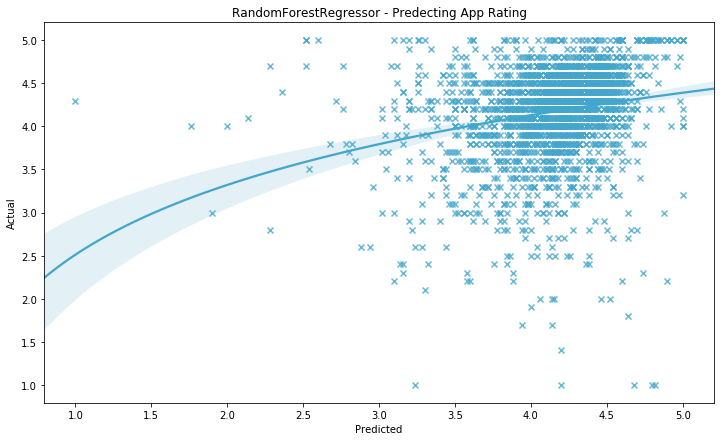

In [40]:
plt.figure(figsize=(12,7))
sns.regplot(predicted, y_test, color='#43a6cc', marker = 'x', logx=True)
plt.title('RandomForestRegressor - Predecting App Rating')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">4.2 Inputing missing rating values</h2>
</div>

In [41]:
rating_missing = data[data["Rating"].isnull()]
imputed_ratings = random_forest.predict(rating_missing[include])
data.loc[data["Rating"].isnull(), "Rating"] = imputed_ratings

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">5. Dataset Visualization</h2>
    <strong style="color:white">Asking questions and aswering them.</strong>
    <ol style="color: white; font-weight: bold">
        <li>Scatter Matrix</li>
        <li>What is the percentage of paid to free apps?</li>
        <li>What is the most dominant category?</li>
        <li>What size should my app have?</li>
        <li>What price should my paid app have?</li>
        <li>What are the number of installs for apps priced more than $100?</li>
        <li>What is the most successful category?</li>
        <li>Distribution of app sizes</li>
        <li>Rating per categories and type</li>
    </ol>
</div>

In [42]:
plt.rcParams['figure.figsize']=(10,20)

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">5.1 Scatter Matrix</h2>
</div>

/home/grgmgd/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


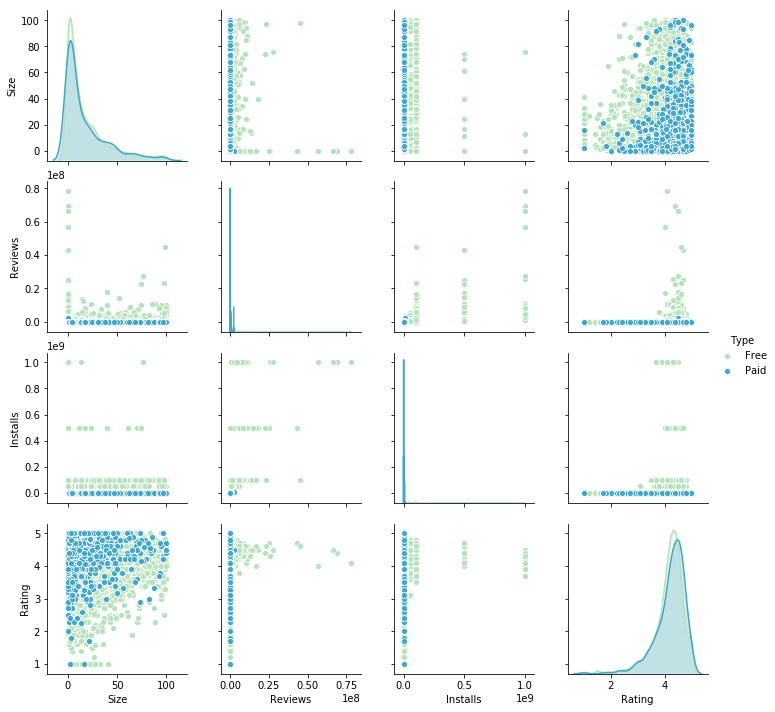

In [43]:
sns.pairplot(data[["Size", "Reviews", "Installs", "Rating", "Type"]], hue="Type", palette="GnBu")

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">This matches our assumption that size greatly affects other features. <strong>The Scatter Matrix shows that when the app size is relatively small, other features prosper. This shows that cosumer behaviour on the play store is greatly affected by the app download size.</strong></p> 
    <p style="color:white"><strong>Takeaway: Developers should optimize their app download size as much as possible. </strong></p>
    </div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">5.2 What is the percentage of paid to free apps?</h2>
</div>

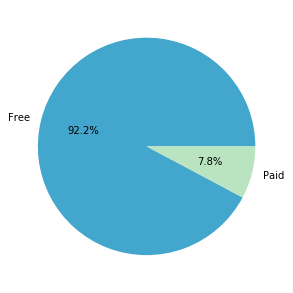

In [44]:
plt.rcParams['figure.figsize']=(5,5)
size = data["Type"].value_counts()
labels = data["Type"].unique()
colors=["#43a6cc", "#bae4bf"]

plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">5.3 What size should my app have?</h2>
</div>

17.820548455638416

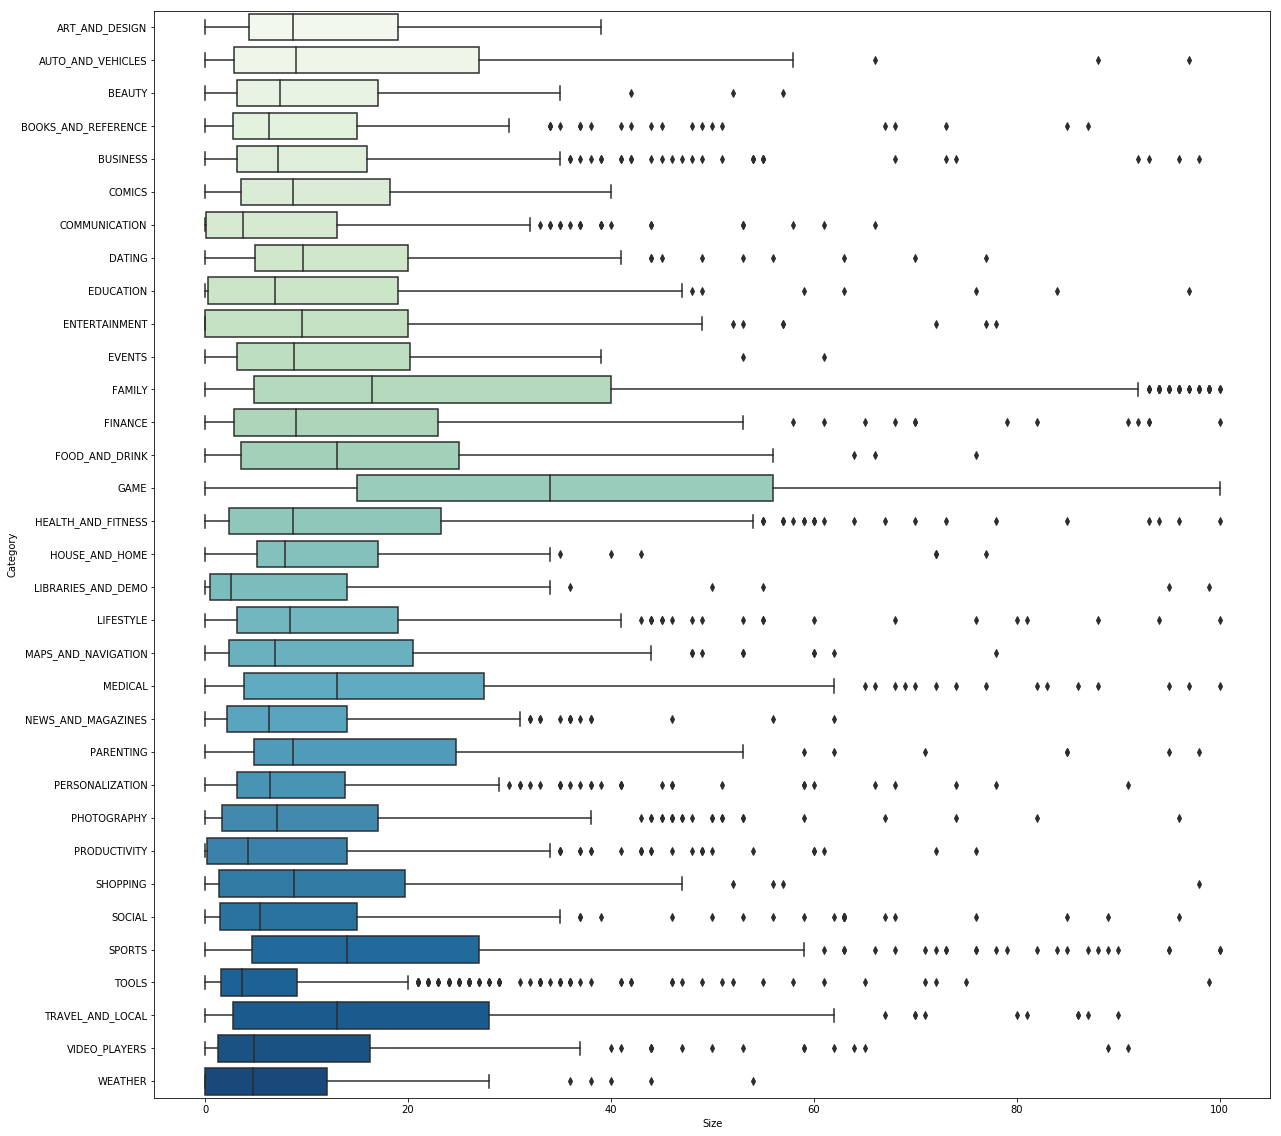

In [45]:
plt.rcParams['figure.figsize']=(20,20)
medians = data.groupby(['Category'])['Size'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
ax = sns.boxplot(x="Size", y="Category", data=data, palette="GnBu")
data["Size"].mean()

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">The trend is games have a much larger download size than any other category.<strong> If you're developing anything other than a game, you need to optimize your downlaod size. on Average any app should have a size of 17.8 MB.</strong></p>
    </div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">5.4 What is the most dominant category?</h2>
</div>

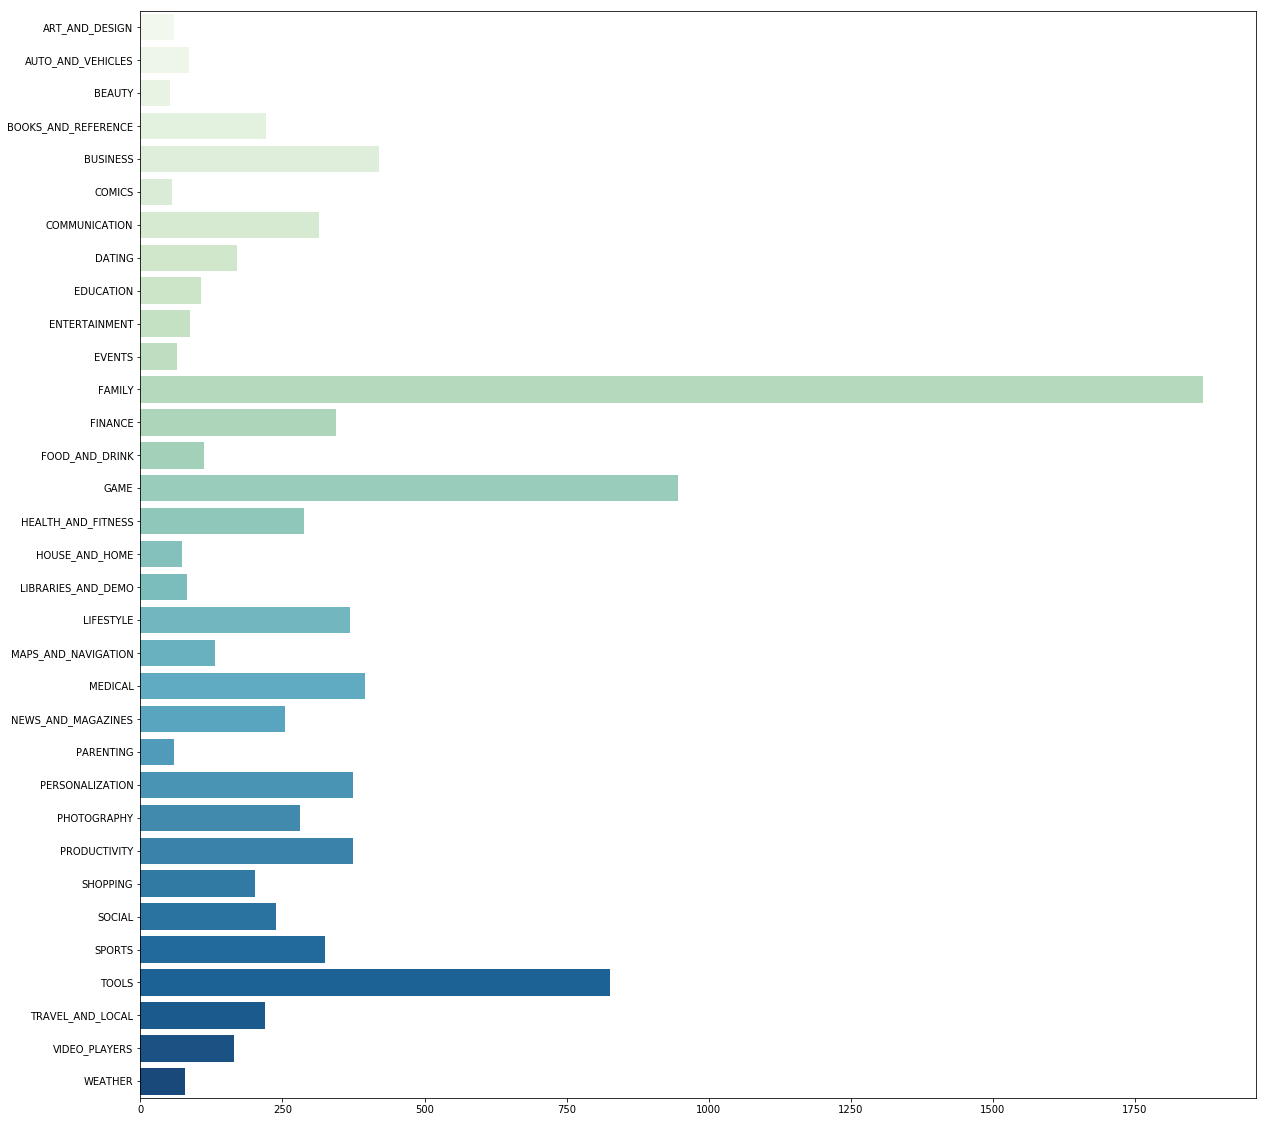

In [46]:
categories = data["Category"].value_counts()
sns.barplot(x=categories.values, y=categories.index, palette="GnBu")

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white"><strong>This is an interesting finding, our first assumption for the most dominant category was games.</strong></p>
</div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">5.5 What price should my paid app have?</h2>
</div>

1.0981218905472538

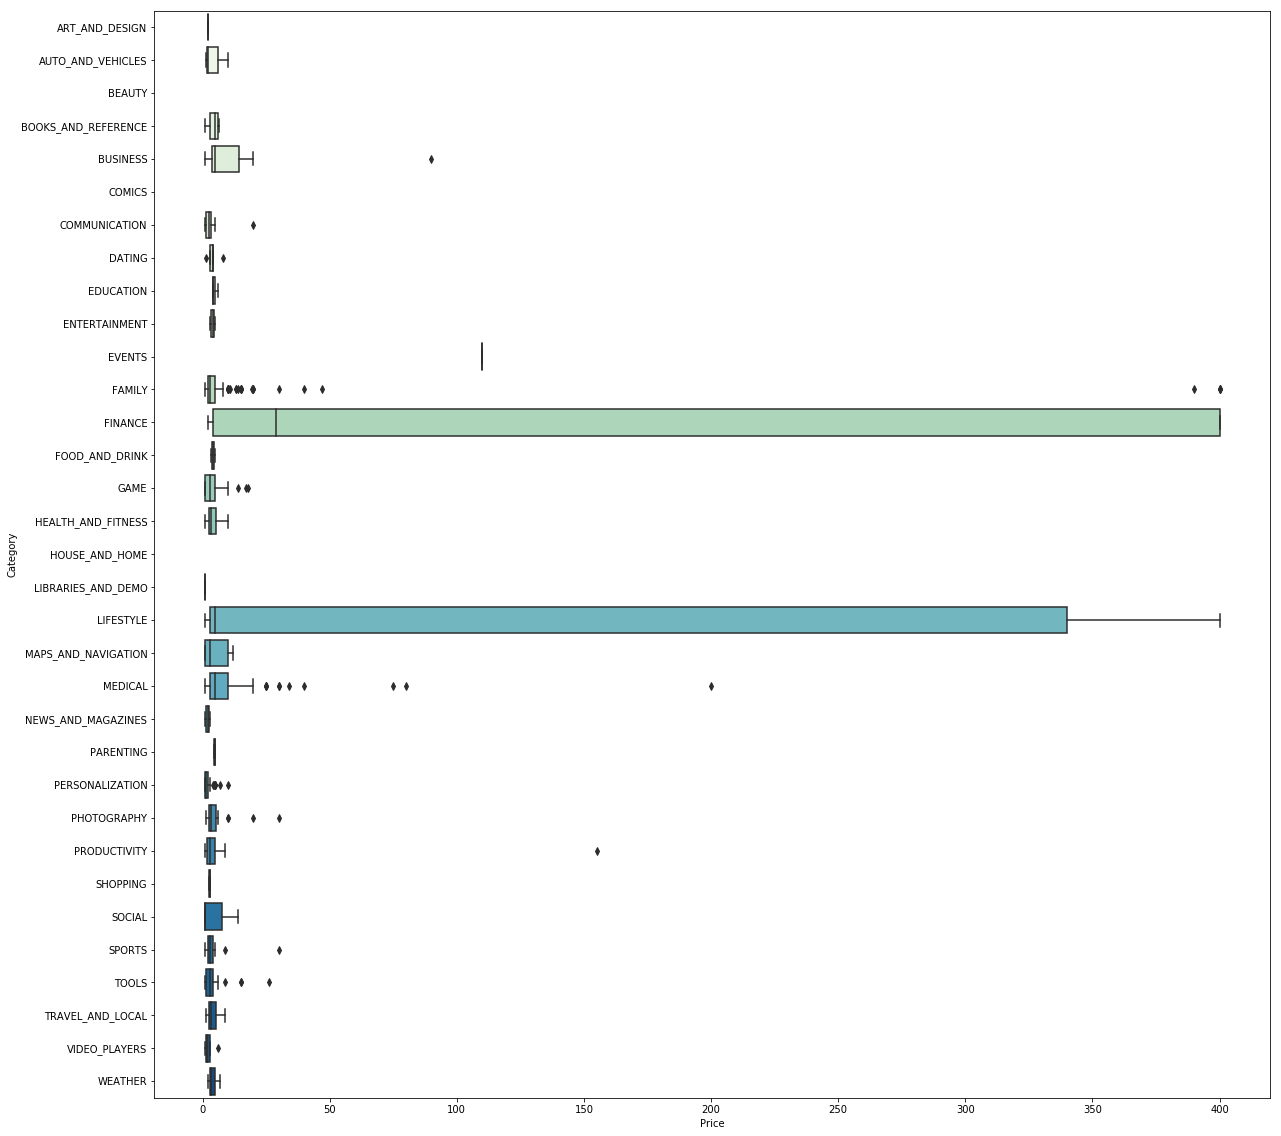

In [47]:
paid_apps = data[data["Type"] == "Paid"]
sns.boxplot(x="Price", y="Category", data=paid_apps, palette="GnBu")
data["Price"].mean()

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">Finance and lifestyle are valued the most but it's intresting to find that there are apps with values of more than \$100.<strong> On average an app price is $1.</strong></p>
</div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">5.6 What are the number of installs for apps priced more than $100?</h2>
</div>

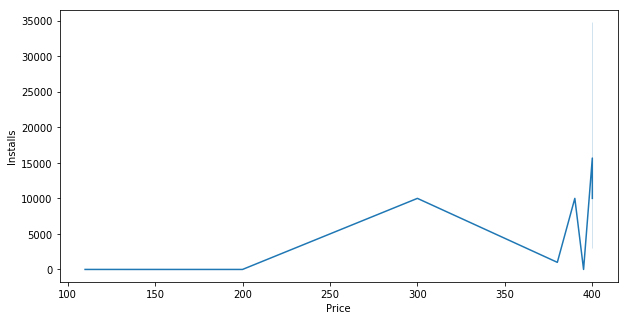

In [48]:
plt.rcParams['figure.figsize']=(10,5)
expensive_apps = data[data["Price"] > 100]
sns.lineplot(x="Price", y="Installs", data=expensive_apps, palette="GnBu")

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white"><strong>There are only 20 apps values of more than $100. However, the number of installs can get as high as 15k Downloads.</strong> </p>
</div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">5.7 What is the most successful category?</h2>
</div>

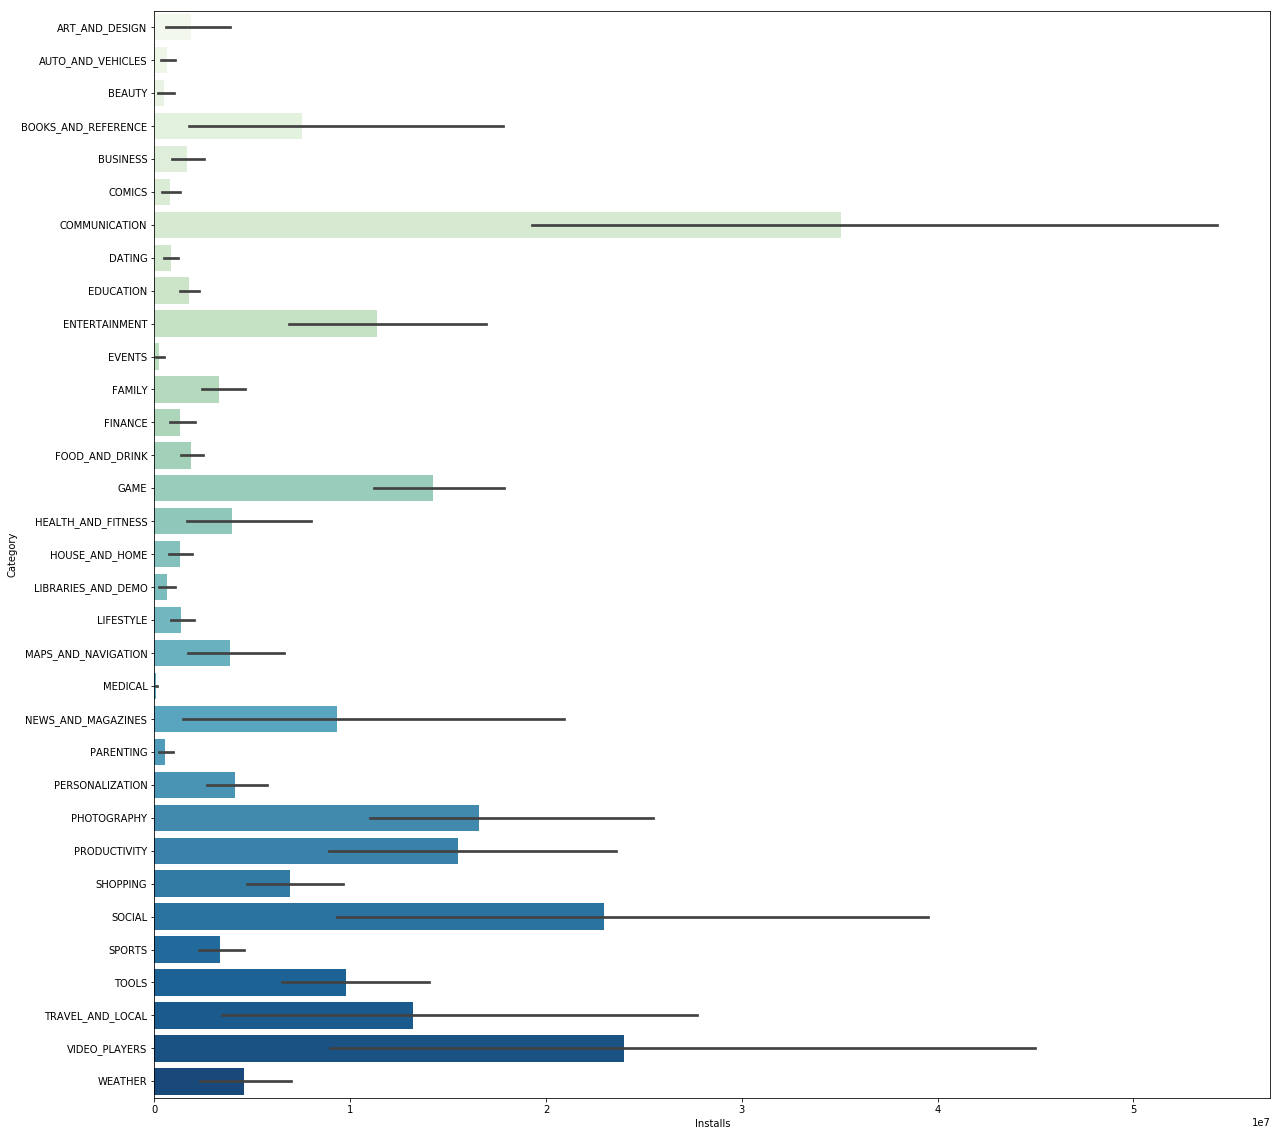

In [49]:
plt.rcParams['figure.figsize']=(20,20)
plot = sns.barplot(x="Installs", y="Category", data=data, palette="GnBu")

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white"><strong>Most successful category based on the number of installs is the communication category.</strong></p>
</div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">5.8 Distribution of app sizes</h2>
</div>

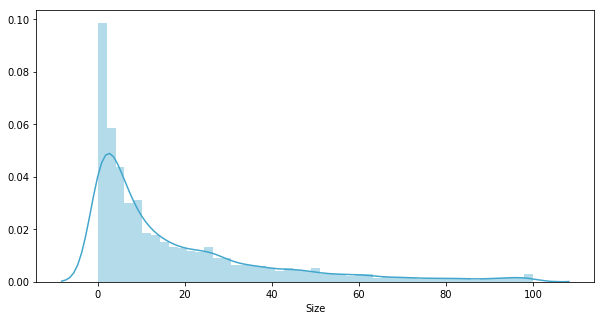

In [52]:
plt.rcParams['figure.figsize']=(10,5)
sns.distplot(data["Size"], color="#43a6cc")

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">5.9 Rating per categories and type</h2>
</div>

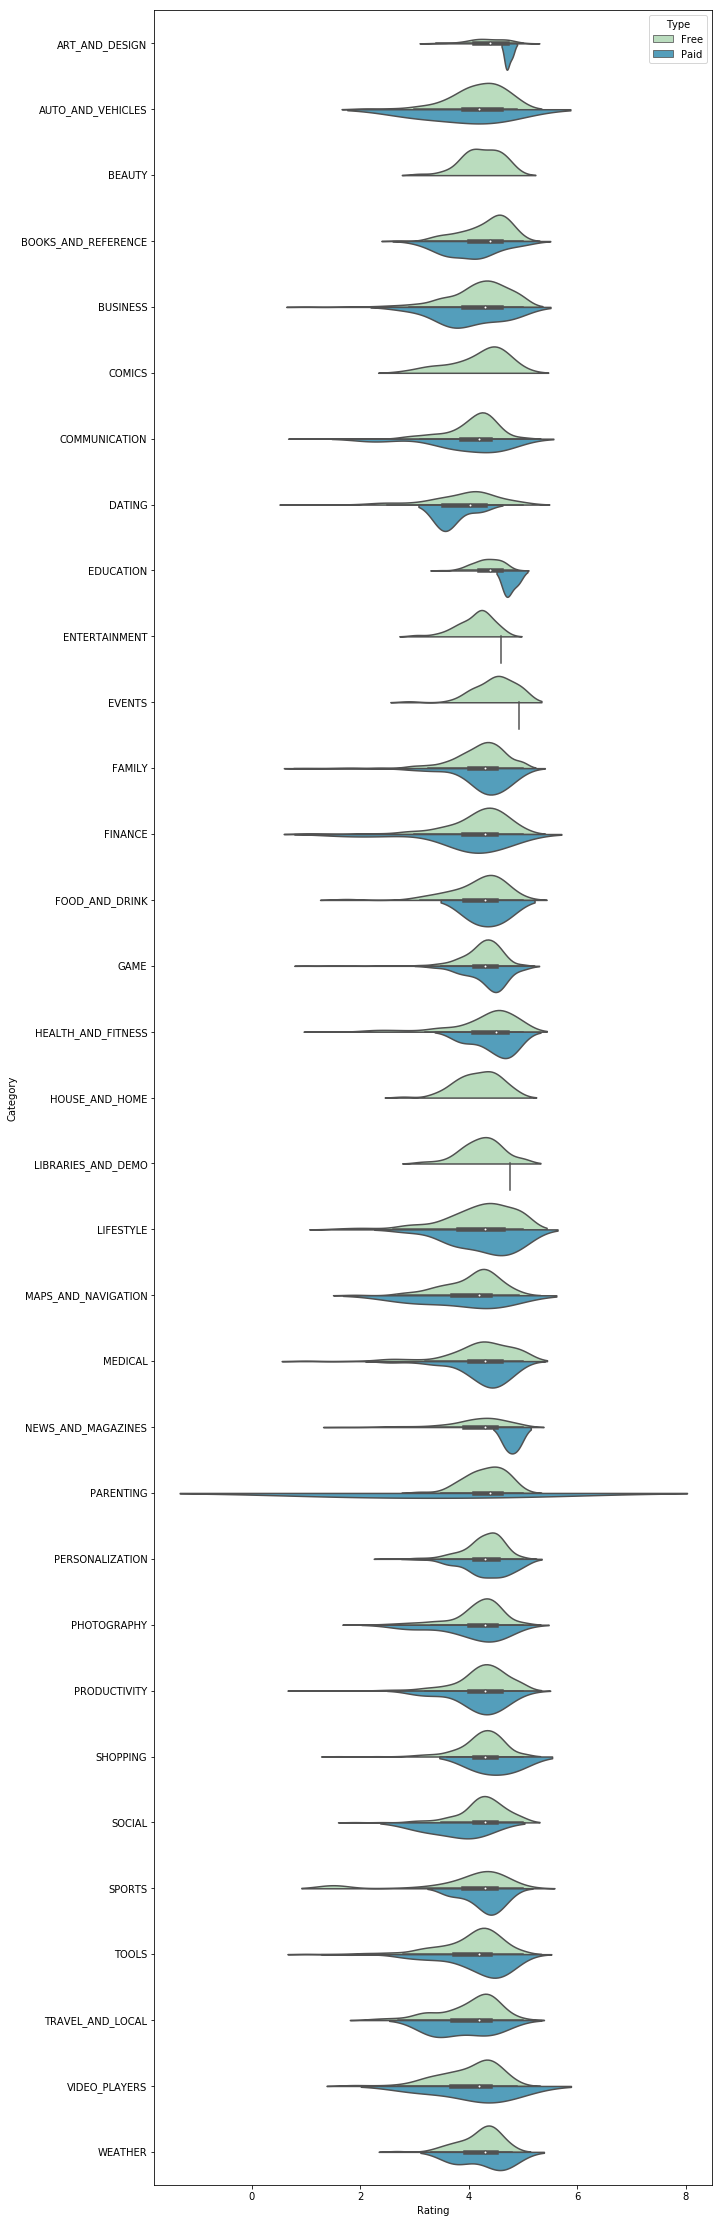

In [71]:
plt.rcParams['figure.figsize']=(10,40)
sns.violinplot(x="Rating", y="Category", hue="Type", data=data, split=True, palette="GnBu")